In [1]:
import numpy as np
labels = ['baseline', '0.1%', '1%', '2%', '5%']

accuracy = [0.6868, 0.7125, 0.7738, 0.6661, 0.5960]
nmi = [0.7372, 0.7665, 0.7836, 0.7417, 0.7044]
kappa = [0.6179, 0.6495, 0.7117, 0.5836, 0.5230]

trento = np.vstack((accuracy, nmi, kappa))

kmeans = [0.14]
transition01 = [0.33, 0.31, 0.33]
transition1 = [0.16, 0.21, 0.16]
transition2 = [0.15, 0.16, 0.15]
transition5 = [0.19, 0.21, 0.19]

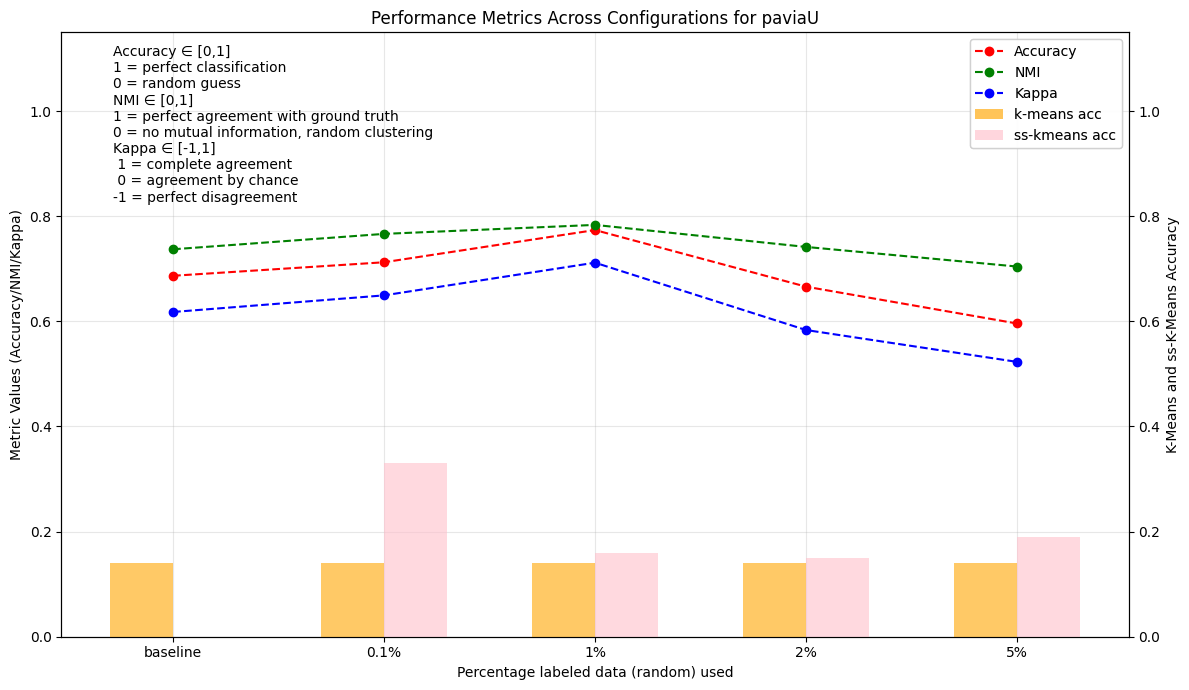

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Data definition
labels = ['baseline', '0.1%', '1%', '2%', '5%']
accuracy = [0.6868, 0.7125, 0.7738, 0.6661, 0.5960]
nmi = [0.7372, 0.7665, 0.7836, 0.7417, 0.7044]
kappa = [0.6179, 0.6495, 0.7117, 0.5836, 0.5230]

kmeans_value = 0.14
ss_new_acc_values = [0, 0.33, 0.16, 0.15, 0.19]

# Setup figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))
x = np.arange(len(labels))
width = 0.3

# Line plot (left y-axis)
ax1.plot(labels, accuracy, marker='o', linestyle='--', color='red', label='Accuracy')
ax1.plot(labels, nmi, marker='o', linestyle='--', color='green', label='NMI')
ax1.plot(labels, kappa, marker='o', linestyle='--', color='blue', label='Kappa')
ax1.set_ylabel('Metric Values (Accuracy/NMI/Kappa)', color='black')
ax1.set_ylim(0, 1.15)
ax1.grid(True, alpha=0.3)

# Create a second y-axis for histogram
ax2 = ax1.twinx()

# Histogram bars (right y-axis)
bars1 = ax2.bar(x - width/2, [kmeans_value]*len(labels), width, label='k-means acc', alpha=0.6, color='orange')
bars2 = ax2.bar(
    x + width/2,
    [val if val is not None else 0 for val in ss_new_acc_values],
    width,
    label='ss-kmeans acc',
    color='pink',
    alpha=0.6
)

# Hide irrelevant bar for baseline
for bar, val in zip(bars2, ss_new_acc_values):
    if val is None:
        bar.set_visible(False)

ax2.set_ylabel('K-Means and ss-K-Means Accuracy', color='black')
ax2.set_ylim(0, 1.15)
ax2.patch.set_alpha(0)

# Customizing plot
plt.title('Performance Metrics Across Configurations for paviaU')
ax1.set_xlabel('Percentage labeled data (random) used')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Legends
lines, labels_lines = ax1.get_legend_handles_labels()
bars, labels_bars = ax2.get_legend_handles_labels()
legend1 = ax2.legend(lines + bars, labels_lines + labels_bars, loc='upper right')
ax2.add_artist(legend1)

# Explanation legend (bottom left)
explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    "NMI ∈ [0,1]\n"
    "1 = perfect agreement with ground truth\n"
    "0 = no mutual information, random clustering\n"
    "Kappa ∈ [-1,1]\n"
    " 1 = complete agreement\n"
    " 0 = agreement by chance\n"
    "-1 = perfect disagreement"
)
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)
ax1.legend(handles=[dummy_handle], loc='upper left', frameon=False)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout()
plt.show()